### SHOWING Linear SVM and RBF cannot be used for classification for few dataset

In [2]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets, svm 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
wine=pd.read_csv('data/winequality-white - Copy.csv')

In [4]:
wine.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
128,6.1,0.30,0.56,2.8,0.044,47.0,179.0,0.9924,3.30,0.57,10.9,7
112,7.2,0.31,0.50,13.3,0.056,68.0,195.0,0.9982,3.01,0.47,9.2,5
67,6.7,0.25,0.13,1.2,0.041,81.0,174.0,0.9920,3.14,0.42,9.8,5


#### This dataset tells in which country the engine of the car was made depending on the attributes shown above

#### Normalizing the dataset

In [5]:
col=['free sulfur dioxide','total sulfur dioxide']

In [6]:
for i in col:
    wine[i]=(wine[i]-wine[i].min())/(wine[i].max()-wine[i].min())
    

In [7]:
wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
124,6.4,0.13,0.47,1.6,0.092,0.467532,0.533654,0.9928,3.21,0.36,9.8,6


In [8]:
features=wine.columns[:-1]
target=wine.columns[-1]

In [9]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
target

'quality'

In [11]:
train,test=train_test_split(wine,test_size=0.2)

In [12]:
len(train)

159

In [13]:
len(test)

40

In [14]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(train[features], train[target])
    predicted=model.predict(test[features])
    acc = accuracy_score(test[target],predicted)*100
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

47.5 % accuracy obtained with kernel = linear
50.0 % accuracy obtained with kernel = poly
47.5 % accuracy obtained with kernel = rbf


In [23]:
test.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
103,7.5,0.305,0.4,18.9,0.059,0.519481,0.591346,1.0,2.99,0.46,9.0,5


In [16]:
model.predict(test[features])

array([6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 7, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6], dtype=int64)

# Visualize the decision boundaries

In [17]:
features=['volatile acidity','residual sugar']
# the features are Horsepower and acceleration 

In [18]:
deg=5

In [19]:
svc = svm.SVC(kernel='linear').fit(train[features],train[target] )
rbf_svc = svm.SVC(kernel='rbf', gamma=0.8).fit(train[features], train[target])
poly_svc = svm.SVC(kernel='poly', degree=deg).fit(train[features], train[target])

In [20]:
#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = wine[features[0]].min() - 1, wine[features[0]].max() + 1
y_min, y_max = wine[features[1]].min() - 1, wine[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

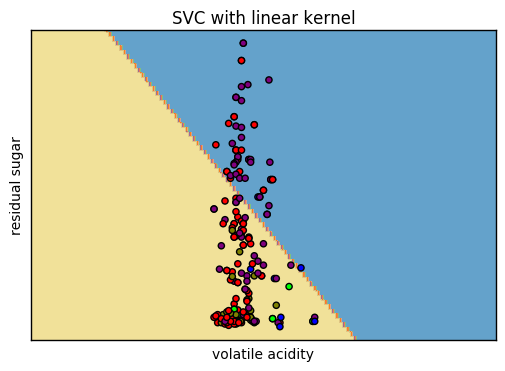

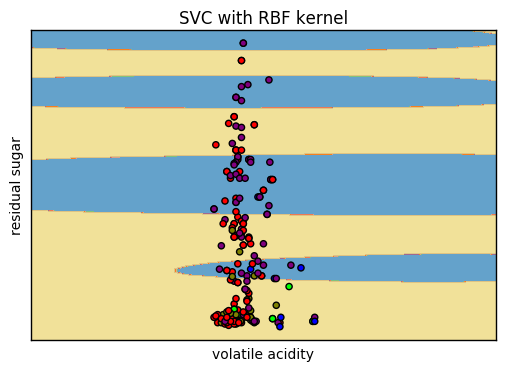

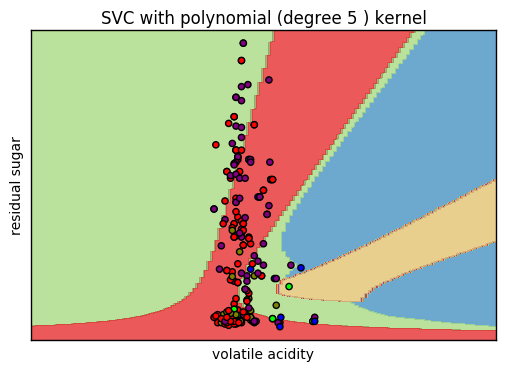

In [21]:
#Define title for the plots
string='SVC with polynomial (degree '+str(deg) +' ) kernel'
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
           string]


for i, model in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel returns continuous flaten array

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #cmap stands for color map you can also make it to None

    
    
    # Plot also the training points
    plt.scatter(wine[features[0]], wine[features[1]], c=wine[target], cmap=plt.cm.brg)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### The dataset is not properly classified using RBF and poly with kernel 5

In [22]:
#Checking the support vectors of the linear kernel
print("The support vectors for linear kernel are:\n", svc.support_vectors_)
print()
print()

#Checking the support vectors of the rbf kernel
print("The support vectors for radial basis function are:\n", rbf_svc.support_vectors_)
print()
print()

#Checking the support vectors of the polynomial kernel (for example)
print("The support vectors for polynomial kernel are:\n", poly_svc.support_vectors_)


The support vectors for linear kernel are:
 [[  0.28    8.5  ]
 [  0.45    4.4  ]
 [  0.595   5.2  ]
 [  0.36   10.5  ]
 [  0.67    1.2  ]
 [  0.485   1.5  ]
 [  0.48    0.8  ]
 [  0.27    4.8  ]
 [  0.12    9.6  ]
 [  0.42    9.85 ]
 [  0.27   18.75 ]
 [  0.18    1.2  ]
 [  0.27   17.7  ]
 [  0.37   10.5  ]
 [  0.24   17.95 ]
 [  0.33    1.3  ]
 [  0.54    5.4  ]
 [  0.28    1.7  ]
 [  0.23    4.2  ]
 [  0.26   10.4  ]
 [  0.21   12.1  ]
 [  0.31   13.3  ]
 [  0.3     4.2  ]
 [  0.27    1.45 ]
 [  0.31    2.2  ]
 [  0.24   10.1  ]
 [  0.47    1.1  ]
 [  0.46    4.4  ]
 [  0.18    8.8  ]
 [  0.26   11.9  ]
 [  0.39    7.   ]
 [  0.27   14.95 ]
 [  0.24   13.1  ]
 [  0.18    1.2  ]
 [  0.39    5.4  ]
 [  0.27    8.1  ]
 [  0.36    5.7  ]
 [  0.23   13.   ]
 [  0.24   10.1  ]
 [  0.27    7.5  ]
 [  0.34    1.2  ]
 [  0.24   15.8  ]
 [  0.32   13.3  ]
 [  0.29   11.9  ]
 [  0.37   10.5  ]
 [  0.67    1.5  ]
 [  0.43   11.8  ]
 [  0.25   13.5  ]
 [  0.425  13.1  ]
 [  0.31   13.3  ]
 [  0.